In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
df = pd.read_csv("/home/algo/Desktop/IMS/imp_metrics_pf.csv")
# df["last_trans"] = pd.to_datetime(df["last_trans"], format='%m/%d/%Y')
df.shape

(285707, 5)

In [6]:
df.head(2)

,id,seat,transaction,spend,end_date
0,15,174,3,31.32,12/29/2015
1,89,27,5,682.49,8/8/2015


In [7]:
df1 = df.copy()
df2 = df.copy()
df1 = df1[['seat','transaction','spend']]
df1['seat']= preprocessing.scale(df1['seat'].astype('float64'))
df1['transaction']= preprocessing.scale(df1['transaction'].astype('float64'))
df1['spend']= preprocessing.scale(df1['spend'].astype('float64'))
# train,test = train_test_split(df1,test_size = 0.2,random_state = 123)
df2['seat']= preprocessing.scale(df2['seat'].astype('float64'))
df2['transaction']= preprocessing.scale(df2['transaction'].astype('float64'))
df2['spend']= preprocessing.scale(df2['spend'].astype('float64'))


In [8]:
from scipy.spatial.distance import cdist
clusters = range(1,30)
mean_dist =[]
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(train)
    clusassign = model.predict(train)
    mean_dist.append(sum(np.min(cdist(train,model.cluster_centers_,'euclidean'),axis =1))
                     / train.shape[0])



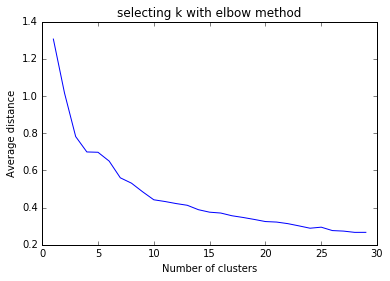

In [8]:
# import matplotlib.pylab as plt
# plt.plot(clusters,mean_dist)
# plt.xlabel("Number of clusters")
# plt.ylabel("Average distance")
# plt.title("selecting k with elbow method")
# plt.show()


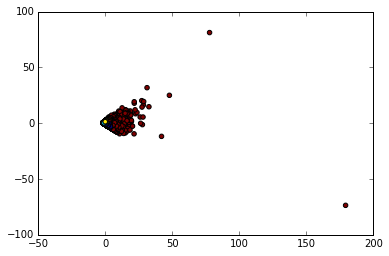

In [9]:
train = df1
model = KMeans(n_clusters= 4)
model.fit(train)
clusassign = model.predict(train)
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
pca2 = PCA(2)
plot_columns = pca2.fit_transform(train)
plt.scatter(x = plot_columns[:,0],y= plot_columns[:,1],c = model.labels_,)
plt.show()

In [10]:
train.reset_index(level = 0,inplace = True)
train_df = pd.merge(train,df2,left_index = True,right_index = True)
train_df.drop(['seat_y','transaction_y','spend_y'], axis=1,inplace = True)
train_df.shape


(285707, 6)

In [11]:
cluslist = list(train_df.index)
labels = list(model.labels_)
newlist = dict(zip(cluslist,labels))


In [12]:
newclus = pd.DataFrame.from_dict(newlist,orient = "index")
newclus.columns = ['cluster']
newclus.reset_index(level =0 , inplace = True)


In [13]:
merged = pd.merge(train_df,newclus,left_index = True,right_index = True)

merged.cluster.value_counts()


1    160819
2     78019
0     37209
3      9660
Name: cluster, dtype: int64

In [14]:
final = pd.merge(merged,df,left_index = True,right_index = True)


In [15]:
final.to_csv("/home/algo/Desktop/4clusters_output.csv",index = False)
